# Random Forest Classifier for Predict Customer Churn
a company needs to know the prediction of customer churn. Information about which customers are potentially churn can give companies advice on how to treat customers to prevent them from churning. Customer churn prediction can be built using several methods such as random forest classifier. Classification methods in machine learning can be affected by data balance conditions. Data with unbalanced target variable categories will make the classification more inclined to the majority category so unbalanced data needs to be balanced first.

In this project, I will make three types of random forest classifiers, i.e without balancing, balancing with the overfitting, and underfitting methods.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:/data analysis/data latihan/IT_customer_churn.csv")
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Pre Processing data

In [3]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there are no missing value in the dataset

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The Senior Citizen variable provides information on whether the customer is a senior citizen or not. If yes the value will be 1 and 0 otherwise. So the type of this variable is categorical, so the data type needs to be changed to str

In [6]:
df['SeniorCitizen'] =df['SeniorCitizen'].astype(str)

In [7]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

based on the output above, the total total charges type should be float (numeric). Maybe there are some values in the dataset that make the type change so we need to fix it

In [8]:
df[df['TotalCharges'] == ' '].head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


there are several rows with empty total charges. 

I use pd.to_numeric with `errors` set to `coerce` to change the variable type. `coerce` will change the empty value to a missing value

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [10]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# drop the missing value
df.dropna(inplace=True)

In [13]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.shape

(7032, 20)

# Exploratory Data Analysis

In [15]:
import seaborn as sns

<AxesSubplot: >

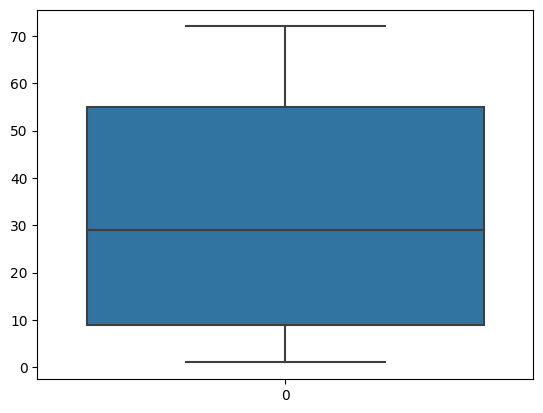

In [16]:
sns.boxplot(df['tenure'])

<AxesSubplot: >

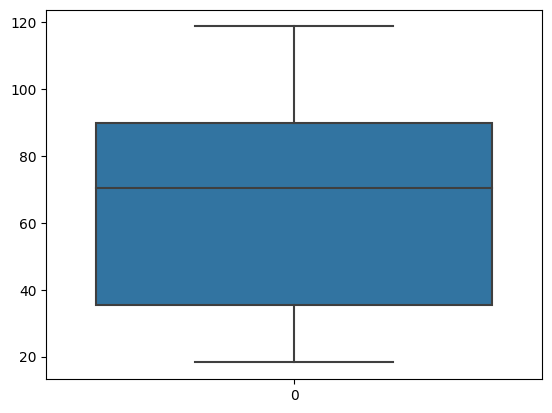

In [17]:
sns.boxplot(df['MonthlyCharges'])

<AxesSubplot: >

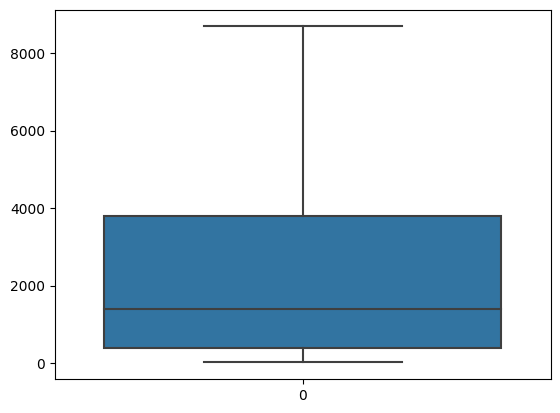

In [18]:
sns.boxplot(df['TotalCharges'])

there are no outlier in tenure, monthly charges and total charges

In [19]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [20]:
df.select_dtypes(object).columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

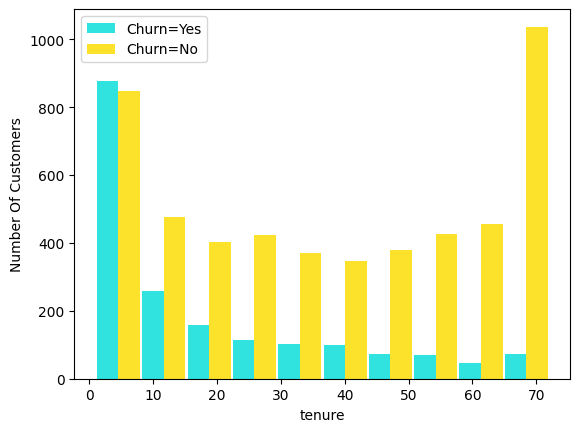

In [21]:
import matplotlib.pyplot as plt
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['#30E3DF','#FCE22A'],label=['Churn=Yes','Churn=No'])
plt.legend()

Most customer churn occurs in less than 10 years of service. So the company should provide some special services for new customers and maintain services for existing customers to reduce churn probability.

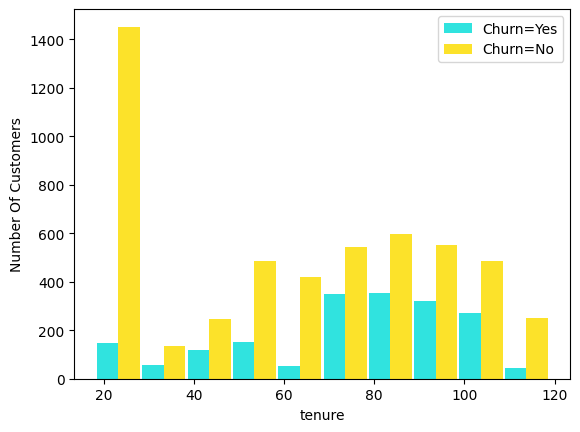

In [40]:
monthly_churn_no = df[df.Churn=='No'].MonthlyCharges
monthly_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")

plt.hist([monthly_churn_yes, monthly_churn_no], rwidth=0.95, color=['#30E3DF','#FCE22A'],label=['Churn=Yes','Churn=No'])
plt.legend()

most of the churn happens to customers with 70 to 100 monthly charges. Companies need to check the services provided in those monthly charges that make customers churn

# modelling

In [42]:
# mengubah churn dengan kategori No menjadi 0 dan Yes menjadi 1
df.loc[df['Churn'] == 'No', 'Churn'] = 0
df.loc[df['Churn'] == 'Yes', 'Churn'] = 1
# mengubah churn menjadi integer
df['Churn'] = df['Churn'].astype(int)

In [43]:
df_code = pd.get_dummies(df)
df_code.dtypes

tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
gender_Female                                uint8
gender_Male                                  uint8
SeniorCitizen_0                              uint8
SeniorCitizen_1                              uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [44]:
X = df_code.loc[:, df_code.columns != "Churn"]
Y = df_code['Churn']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y,
                                                    test_size= 0.2, 
                                                    random_state= 42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

## random forest model with unbalanced data

In [50]:
rf_model = rf.fit(X_train, Y_train)
predict = rf_model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [52]:
print("confusion matrix")
print(confusion_matrix(Y_test, predict))
print("accuracy")
print(accuracy_score(Y_test, predict))
print("recall")
print(recall_score(Y_test, predict))
print("precision")
print(precision_score(Y_test, predict))

confusion matrix
[[917 116]
 [199 175]]
accuracy
0.7761194029850746
recall
0.4679144385026738
precision
0.6013745704467354


- the model can predict 78% accurate churn, meaning that the prediction is 78% according to actual data
- the recall score shows that the model correctly predicts only 47% of all churns out of all churns that occur. if we use this model we may lose customers because the model predicts that customers will not churn but actually customers will.
- 60% of churn predictions are correct, and another 40% predict customers not churn as churn

# Balancing Data

data imbalance conditions can cause misclassification results. So, I did two methods of solving unbalanced data to reduce the impact of unbalanced data

## Oversampling
oversampling is a resampling mathode that balances the data set by increasing the minor category of the target variable

In [34]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [38]:
from sklearn.utils import resample
churn_yes = df_code[df_code['Churn'] == 1]
churn_no = df_code[df_code['Churn'] == 0]

upsample = resample(churn_yes, replace=True,
                    n_samples= 5163 ,random_state= 42)

In [39]:
oversampling = pd.concat([churn_no, upsample])

In [41]:
X1 = oversampling.loc[:, oversampling.columns != "Churn"]
Y1 = oversampling["Churn"]

In [42]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1,
                                                        test_size= 0.2, random_state= 42)

In [43]:
rf_model1 = rf.fit(X_train1, Y_train1)

In [44]:
pred1 = rf_model1.predict(X_test1)

In [47]:
print("confusion matrix")
print(confusion_matrix(Y_test1, pred1))
print("recall score")
print(recall_score(Y_test1, pred1))
print("precision score")
print(precision_score(Y_test1, pred1))
print("accuracy score")
print(accuracy_score(Y_test1, pred1))

confusion matrix
[[911 153]
 [ 47 955]]
recall score
0.9530938123752495
precision score
0.8619133574007221
accuracy score
0.9031945788964182


- 95% of the churns were successfully predicted from all the churns that occurred
- 86% of churn predictions are correct out of all churn predictions
- model predictions are 90% correct

## Undersampling
undeersampling is a resampling method that balances data by decreasing the mayor category of the target variable

In [50]:
under = resample(churn_no, n_samples=1869, random_state= 42)

In [52]:
undersampling = pd.concat([churn_yes, under])

In [53]:
X2 = undersampling.loc[:, undersampling.columns != "Churn"]
Y2 = undersampling["Churn"]

In [54]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, 
                                                        test_size=0.2, random_state= 42)

In [55]:
rf_model2 = rf.fit(X2_train, Y2_train)

In [56]:
pred2 = rf_model2.predict(X2_test)

In [58]:
print("confusion matrix")
print(confusion_matrix(Y2_test, pred2))
print("recall score")
print(recall_score(Y2_test, pred2))
print("precision score")
print(precision_score(Y2_test, pred2))
print("accuracy score")
print(accuracy_score(Y2_test, pred2))

confusion matrix
[[295  74]
 [ 92 287]]
recall score
0.7572559366754618
precision score
0.7950138504155124
accuracy score
0.7780748663101604


- recall score show that 75% of churn are predict correctly from all of the churn
- 79% prediction of churn are correct
- the model predict 78% accurate


- the evaluation matrix the best random forest model to predict the IT customer churn are the model with the oversampling method.
- the imbalanced data might impact the prediction it's proven by the result of the random forest classification without handling imbalance data worst than another random forest classification